In [2]:
import pandas as pd
df = pd.read_csv('C:/Users/REGGIE/Desktop/数据分析资料/data/customer_churn.csv',index_col = 0,header = 0)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [3]:
#数据前处理
df = df.iloc[:,3:]
cat_var = ['international_plan','voice_mail_plan','churn']

for v in cat_var:
    df[v] = df[v].map(lambda x : 1 if x =='yes' else 0)
    
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [4]:
#把数据集分为训练数据集，测试数据集
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.33,random_state = 123)

In [9]:
#train_x.shape
#test_x.shape

In [31]:
#使用决策树建立分类模型
from sklearn.tree import tree

clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [32]:
predicted = clf.predict(test_x)

In [33]:
#产生混淆矩阵以及其他评估指标
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print(accuracy_score(test_y,predicted))
print(confusion_matrix(test_y,predicted))

0.8936363636363637
[[924  26]
 [ 91  59]]


In [34]:
from sklearn.metrics import classification_report
print(classification_report(test_y,predicted))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       950
           1       0.69      0.39      0.50       150

    accuracy                           0.89      1100
   macro avg       0.80      0.68      0.72      1100
weighted avg       0.88      0.89      0.88      1100



In [35]:
#使用ROC比较不同的模型,使用ROC时，支持向量机可能性要为TRUE，否则不会生成ROC
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf1.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [36]:
#注意调整参数，让他可以在有限的次数得到结果
from sklearn.svm import SVC
clf2 = SVC(probability=True,kernel='linear',cache_size=7000,max_iter=10000)
clf2.fit(train_x,train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, cache_size=7000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=10000, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [37]:
from sklearn.linear_model import LogisticRegression
clf3 = LogisticRegression()
clf3.fit(train_x,train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
from sklearn.ensemble import RandomForestClassifier
clf4 = RandomForestClassifier()
clf4.fit(train_x,train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


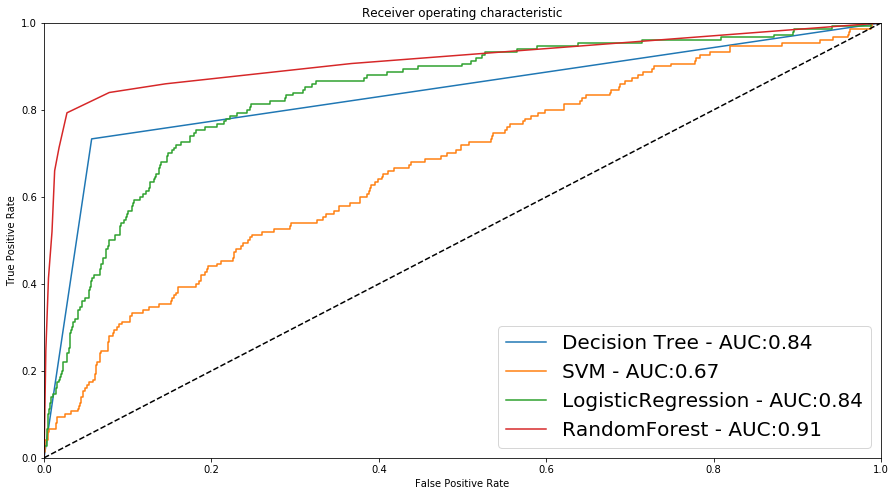

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc

plt.figure(figsize=[15,8])
for clf,title in zip([clf1,clf2,clf3,clf4],['Decision Tree','SVM','LogisticRegression','RandomForest']):
    probas = clf.fit(train_x,train_y).predict_proba(test_x)
    fpr,tpr,thresholds =roc_curve(test_y,probas[:,1])
    plt.plot(fpr,tpr,label = '%s - AUC:%.2f'%(title,auc(fpr,tpr)))
    
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right',fontsize= 20)
plt.show()

In [45]:
#评估每个特征的重要性
clf1.feature_importances_
train_x.columns[clf1.feature_importances_.argsort()[::-1]]

Index(['total_day_charge', 'number_customer_service_calls',
       'total_intl_minutes', 'total_eve_charge', 'total_intl_calls',
       'total_eve_minutes', 'number_vmail_messages', 'international_plan',
       'total_night_charge', 'total_eve_calls', 'total_night_minutes',
       'total_day_minutes', 'total_day_calls', 'voice_mail_plan',
       'total_night_calls', 'total_intl_charge'],
      dtype='object')

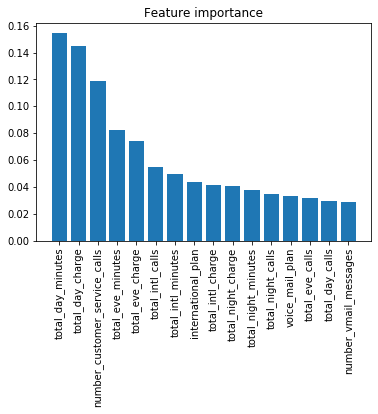

In [49]:
#前面的因子是判断客户是否流失的重要因子，可以选择最前面的几个因子去建立模型，可能会得到更好的模型来判断客户是否真的流失
importance = clf4.feature_importances_
name = train_x.columns
plt.title('Feature importance')
plt.bar(range(0,len(name)),importance[importance.argsort()[::-1]])
plt.xticks(range(0,len(name)),name[importance.argsort()[::-1]],rotation=90)
plt.show()